Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [289]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### I. Forecasting of Airlines Passenger numbers

In [290]:
! pip install xlrd

In [291]:
airline_data=pd.read_excel('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-18-For/Airlines_Data.xlsx')

In [292]:
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [293]:
airline_data.columns

Index(['Month', 'Passengers'], dtype='object')

In [294]:
airline_data['Month']=pd.to_datetime(airline_data['Month'])

In [295]:
airline_data['Month'].min(), airline_data['Month'].max()

(Timestamp('1995-01-01 00:00:00'), Timestamp('2002-12-01 00:00:00'))

In [296]:
airline_data=airline_data[['Month','Passengers']]
airline_data.shape

(96, 2)

In [297]:
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [298]:
airline_data.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [299]:
#to check if there is any error with repitition of dates
airline_data['Month'].value_counts()

Month
1995-01-01    1
1995-02-01    1
2000-11-01    1
2000-10-01    1
2000-09-01    1
             ..
1997-06-01    1
1997-05-01    1
1997-04-01    1
1997-03-01    1
2002-12-01    1
Name: count, Length: 96, dtype: int64

In [300]:
airline_data=airline_data.set_index('Month')

In [301]:
y=airline_data['Passengers'].resample("M").mean()

In [302]:
print(y.shape)
y

(96,)


Month
1995-01-31    112.0
1995-02-28    118.0
1995-03-31    132.0
1995-04-30    129.0
1995-05-31    121.0
              ...  
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
2002-12-31    306.0
Freq: M, Name: Passengers, Length: 96, dtype: float64

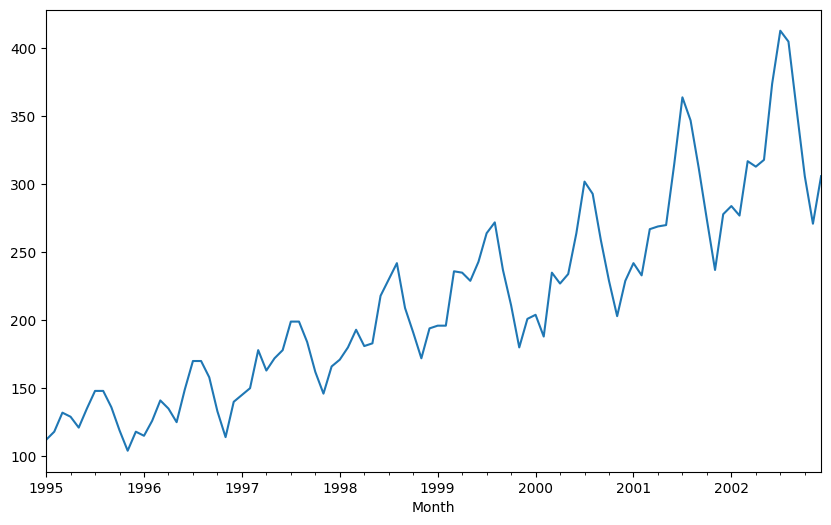

In [303]:
y.plot(figsize=(10,6))
plt.show()

In [304]:
train = y.loc[:'2000-12-31']  # Trainig data as a part of rain_test_split
print(train.shape)
train

(72,)


Month
1995-01-31    112.0
1995-02-28    118.0
1995-03-31    132.0
1995-04-30    129.0
1995-05-31    121.0
              ...  
2000-08-31    293.0
2000-09-30    259.0
2000-10-31    229.0
2000-11-30    203.0
2000-12-31    229.0
Freq: M, Name: Passengers, Length: 72, dtype: float64

In [305]:
test = y.loc['2001-01-01':]   # Testing data as a part of rain_test_split
print(test.shape)           
test

(24,)


Month
2001-01-31    242.0
2001-02-28    233.0
2001-03-31    267.0
2001-04-30    269.0
2001-05-31    270.0
2001-06-30    315.0
2001-07-31    364.0
2001-08-31    347.0
2001-09-30    312.0
2001-10-31    274.0
2001-11-30    237.0
2001-12-31    278.0
2002-01-31    284.0
2002-02-28    277.0
2002-03-31    317.0
2002-04-30    313.0
2002-05-31    318.0
2002-06-30    374.0
2002-07-31    413.0
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
2002-12-31    306.0
Freq: M, Name: Passengers, dtype: float64

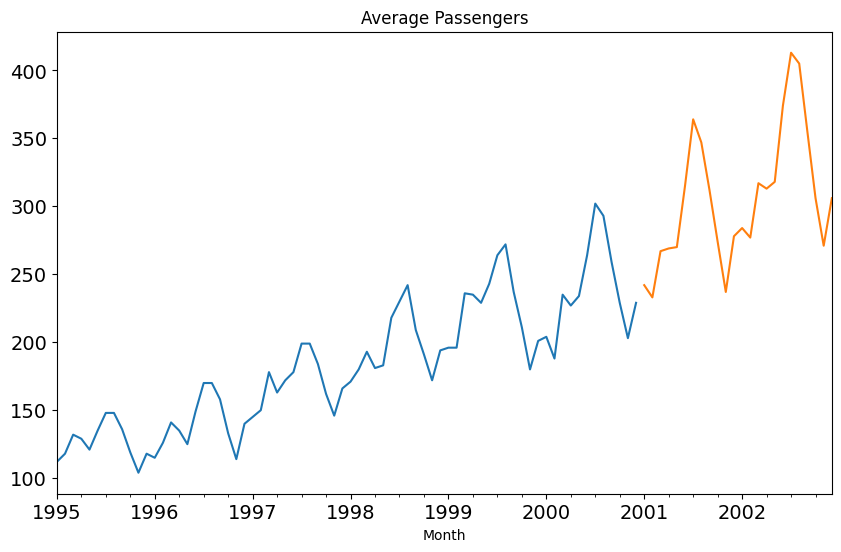

In [306]:
train.plot(figsize=(10,6),title='Average Passengers',fontsize=14)
test.plot(figsize=(10,6),title='Average Passengers',fontsize=14)
plt.show()

### 1. Forecasting using Simple Exponential Smoothening Model

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


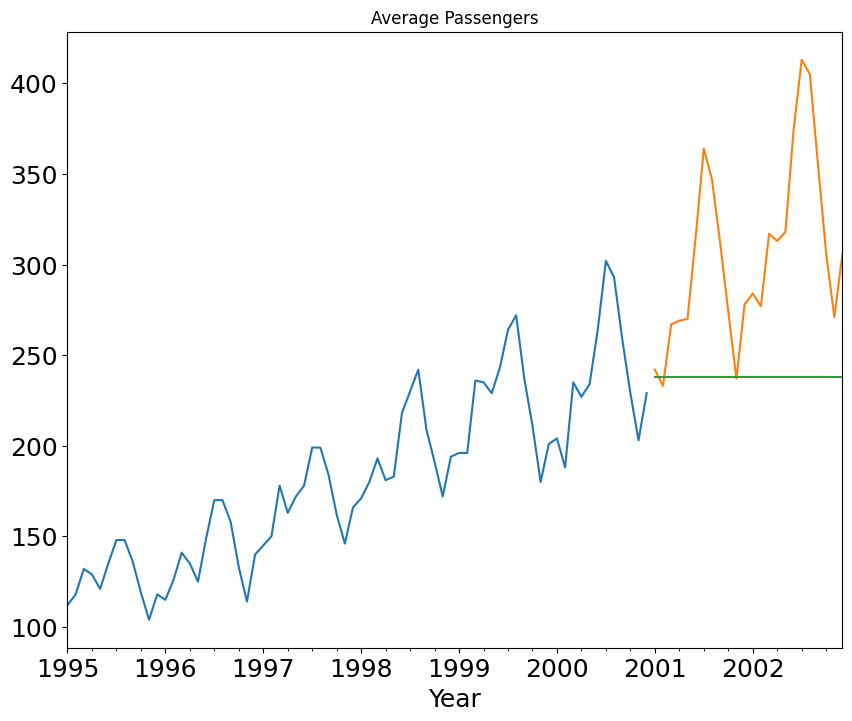

In [307]:
from statsmodels.tsa.api  import SimpleExpSmoothing 
airline_exp_smooth=test.copy()
fit1=SimpleExpSmoothing(train).fit(smoothing_level=0.2)
airline_exp_smooth['SES']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,8), title='Passenger numbers',fontsize=16)

test.plot(figsize=(10,8),title='Passenger Predictions', fontsize=16)
airline_exp_smooth['SES'].plot(figsize=(10,8),title='Average Passengers', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.show()

In [308]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,airline_exp_smooth.SES))
print(rmse)

83.65334218812295


### 2. Forecasting using Holt Model- Linear

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


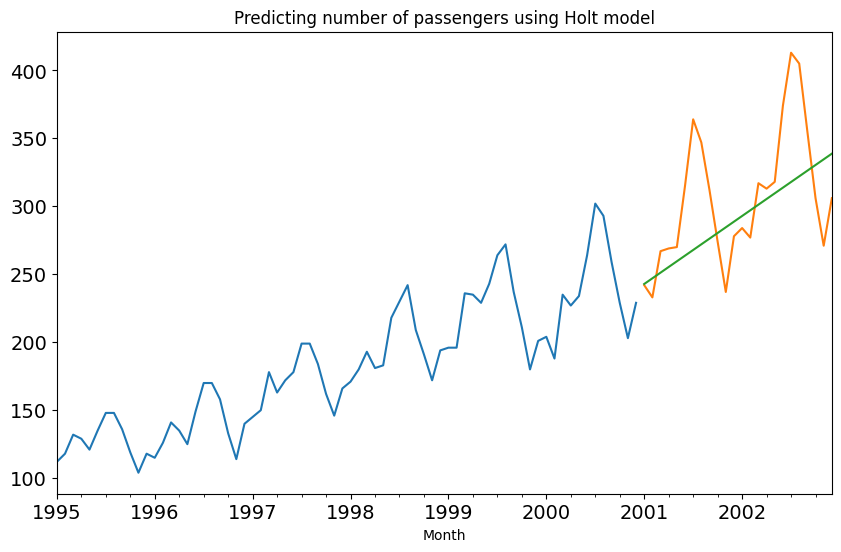

In [309]:
from statsmodels.tsa.api  import Holt

Holt_airlinedata = test.copy()

fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_trend = 0.6) 

Holt_airlinedata['Holt_linear'] = fit1.forecast(steps=len(test))  


train.plot(figsize=(10,6), title= 'Holt- train data', fontsize=14)
test.plot(figsize=(10,6), title= 'Holt- test data', fontsize=14)
Holt_airlinedata['Holt_linear'].plot(figsize=(10,6), title= 'Predicting number of passengers using Holt model', fontsize=14)
plt.show()


In [311]:
rmse = sqrt(mean_squared_error(test, Holt_airlinedata['Holt_linear']))
print(rmse)

45.13030570423104


### 3. Forecasting using Holt Winter Model

<Axes: title={'center': 'Passenger predictions'}, xlabel='Month'>

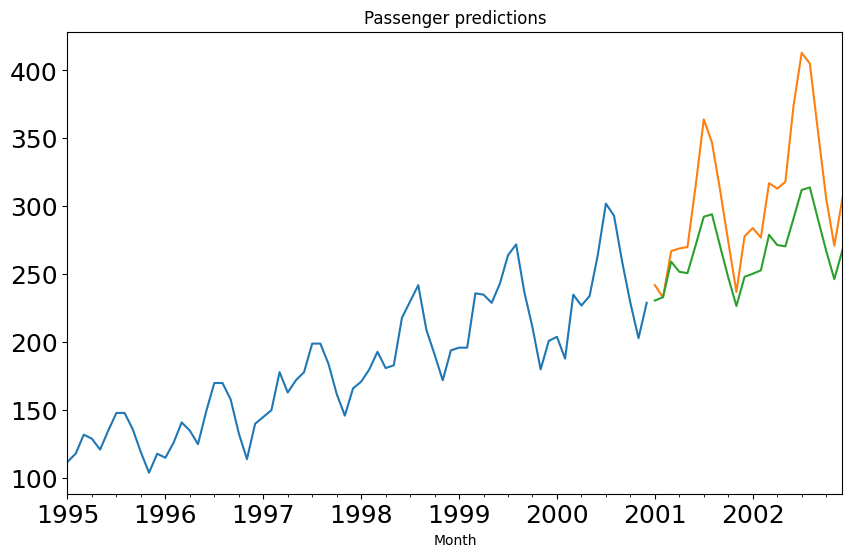

In [313]:
from statsmodels.tsa.api import ExponentialSmoothing 

Holt_Winter_airlinedata=test.copy()

fit1=ExponentialSmoothing(train, seasonal_periods=12,
                          
                          trend='add',
                          seasonal='add').fit()

Holt_Winter_airlinedata['Holt_Winter']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Passengers- train', fontsize=14)
test.plot(figsize=(10,6), title='Passenger- test', fontsize=14)
Holt_Winter_airlinedata['Holt_Winter'].plot(figsize=(10,6), title='Passenger predictions', fontsize=18)

In [314]:

rmse = sqrt(mean_squared_error(test, Holt_Winter_airlinedata['Holt_Winter']))
print(rmse)

47.57251936994982


### 4. Forecasting using SARIMAX

In [315]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

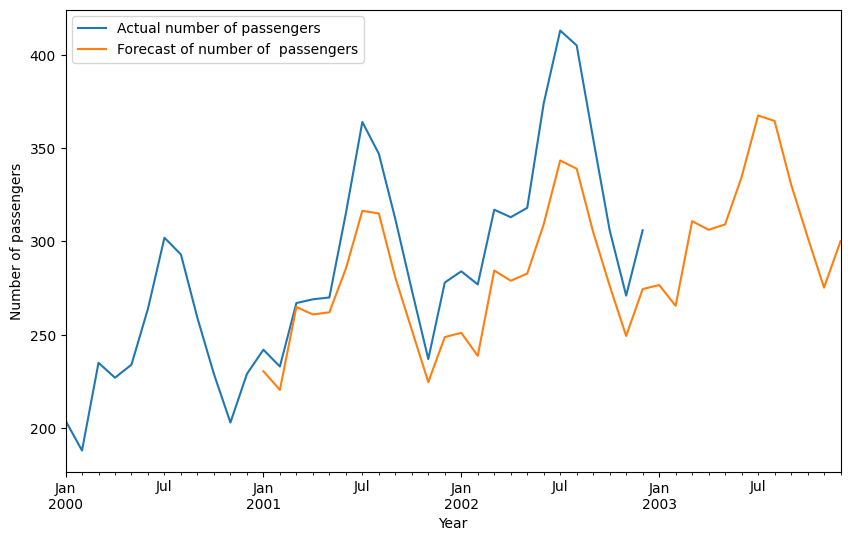

In [316]:
pred=model.get_forecast(steps=36)
plt.figure(figsize=(10,6))
ax=y['2000':].plot(label='Actual number of passengers')
pred.predicted_mean.plot(ax=ax, label='Forecast of number of  passengers')
ax.set_xlabel('Year')
ax.set_ylabel('Number of passengers')
plt.legend()
plt.show()

In [317]:
pred_values = pred.predicted_mean[:len(test)]

# Calculate the RMSE
rmse = sqrt(mean_squared_error(test, pred_values))
print(rmse)

36.113308246015215


In this case SARIMAX and Holt Winter model both are  showing to have good predictions

### II. Forecasting of Forecast the CocaCola prices

In [243]:
cocacola_data=pd.read_excel(r'C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-18-For/CocaCola_Sales_Rawdata.xlsx')

In [244]:
cocacola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [245]:
cocacola_data.columns

Index(['Quarter', 'Sales'], dtype='object')

In [246]:
cocacola_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [247]:
cocacola_data.columns

Index(['Quarter', 'Sales'], dtype='object')

In [248]:
year_quarter = cocacola_data['Quarter'].str.split('_', expand=True)
year_quarter.columns = ['Quarter', 'Year']

# Map the quarter abbreviations to their respective month range
quarter_to_month = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
year_quarter['Date'] = year_quarter['Year'] + '-' + year_quarter['Quarter'].map(quarter_to_month)

# Convert the 'Date' column to datetime format
cocacola_data['Date'] = pd.to_datetime(year_quarter['Date'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23884\1116208367.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cocacola_data['Date'] = pd.to_datetime(year_quarter['Date'])


In [249]:
cocacola_data

,Quarter,Sales,Date
0,Q1_86,1734.827000,1986-03-31
1,Q2_86,2244.960999,1986-06-30
2,Q3_86,2533.804993,1986-09-30
3,Q4_86,2154.962997,1986-12-31
4,Q1_87,1547.818996,1987-03-31
5,Q2_87,2104.411995,1987-06-30
6,Q3_87,2014.362999,1987-09-30
7,Q4_87,1991.746998,1987-12-31
8,Q1_88,1869.049999,1988-03-31
9,Q2_88,2313.631996,1988-06-30


In [250]:
cocacola_data.columns

Index(['Quarter', 'Sales', 'Date'], dtype='object')

In [251]:
cocacola_data['Quarter'] = pd.to_datetime(cocacola_data['Date'])


In [252]:
cocacola_data=cocacola_data.set_index('Quarter')

In [253]:
y=cocacola_data['Sales'].resample("Q").mean()

In [254]:
print(y.shape)

(42,)


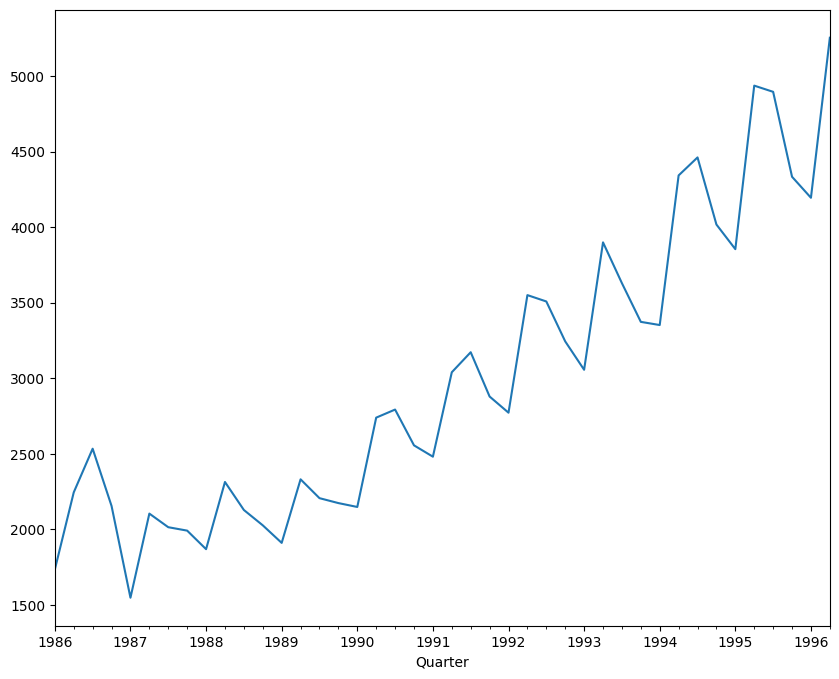

In [255]:
y.plot(figsize=(10,8))
plt.show()

In [256]:
train=y.loc[:'1993-12-31']
print(train.shape)
train

(32,)


Quarter
1986-03-31    1734.827000
1986-06-30    2244.960999
1986-09-30    2533.804993
1986-12-31    2154.962997
1987-03-31    1547.818996
1987-06-30    2104.411995
1987-09-30    2014.362999
1987-12-31    1991.746998
1988-03-31    1869.049999
1988-06-30    2313.631996
1988-09-30    2128.320000
1988-12-31    2026.828999
1989-03-31    1910.603996
1989-06-30    2331.164993
1989-09-30    2206.549995
1989-12-31    2173.967995
1990-03-31    2148.278000
1990-06-30    2739.307999
1990-09-30    2792.753998
1990-12-31    2556.009995
1991-03-31    2480.973999
1991-06-30    3039.522995
1991-09-30    3172.115997
1991-12-31    2879.000999
1992-03-31    2772.000000
1992-06-30    3550.000000
1992-09-30    3508.000000
1992-12-31    3243.859993
1993-03-31    3056.000000
1993-06-30    3899.000000
1993-09-30    3629.000000
1993-12-31    3373.000000
Freq: Q-DEC, Name: Sales, dtype: float64

In [257]:
test=y.loc['1994-01-01':]
print(train.shape)
train

(32,)


Quarter
1986-03-31    1734.827000
1986-06-30    2244.960999
1986-09-30    2533.804993
1986-12-31    2154.962997
1987-03-31    1547.818996
1987-06-30    2104.411995
1987-09-30    2014.362999
1987-12-31    1991.746998
1988-03-31    1869.049999
1988-06-30    2313.631996
1988-09-30    2128.320000
1988-12-31    2026.828999
1989-03-31    1910.603996
1989-06-30    2331.164993
1989-09-30    2206.549995
1989-12-31    2173.967995
1990-03-31    2148.278000
1990-06-30    2739.307999
1990-09-30    2792.753998
1990-12-31    2556.009995
1991-03-31    2480.973999
1991-06-30    3039.522995
1991-09-30    3172.115997
1991-12-31    2879.000999
1992-03-31    2772.000000
1992-06-30    3550.000000
1992-09-30    3508.000000
1992-12-31    3243.859993
1993-03-31    3056.000000
1993-06-30    3899.000000
1993-09-30    3629.000000
1993-12-31    3373.000000
Freq: Q-DEC, Name: Sales, dtype: float64

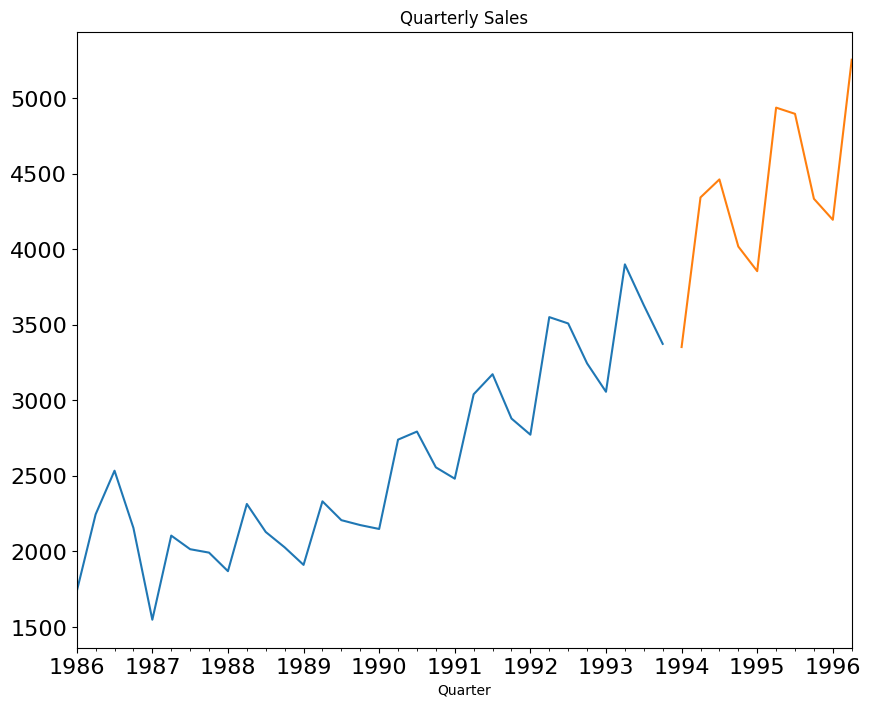

In [258]:
train.plot(figsize=(10,8),title='Quarterly Sales',fontsize=16)
test.plot(figsize=(10,8),title='Quarterly Sales',fontsize=16)
plt.show()

### 1. Forecasting using Simple Exponential Smoothening Model

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


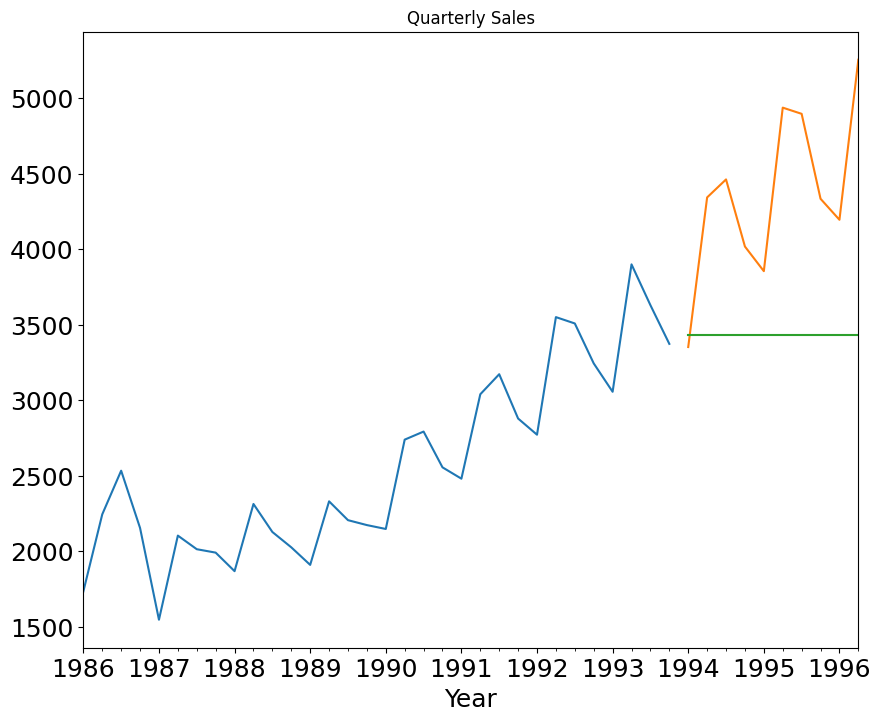

In [263]:
from statsmodels.tsa.api import SimpleExpSmoothing
cocacola_exp_smooth=test.copy()
fit1=SimpleExpSmoothing(train).fit(smoothing_level=0.3)
cocacola_exp_smooth['SES']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,8), title='Sales', fontsize=16)
test.plot(figsize=(10,8),title='Sales', fontsize=16)

cocacola_exp_smooth['SES'].plot(figsize=(10,8),title='Quarterly Sales', fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.show()

In [264]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(test,cocacola_exp_smooth.SES))
print(rmse)

1076.0414737369392


### 2. Forecasting using Holt Model- Linear

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


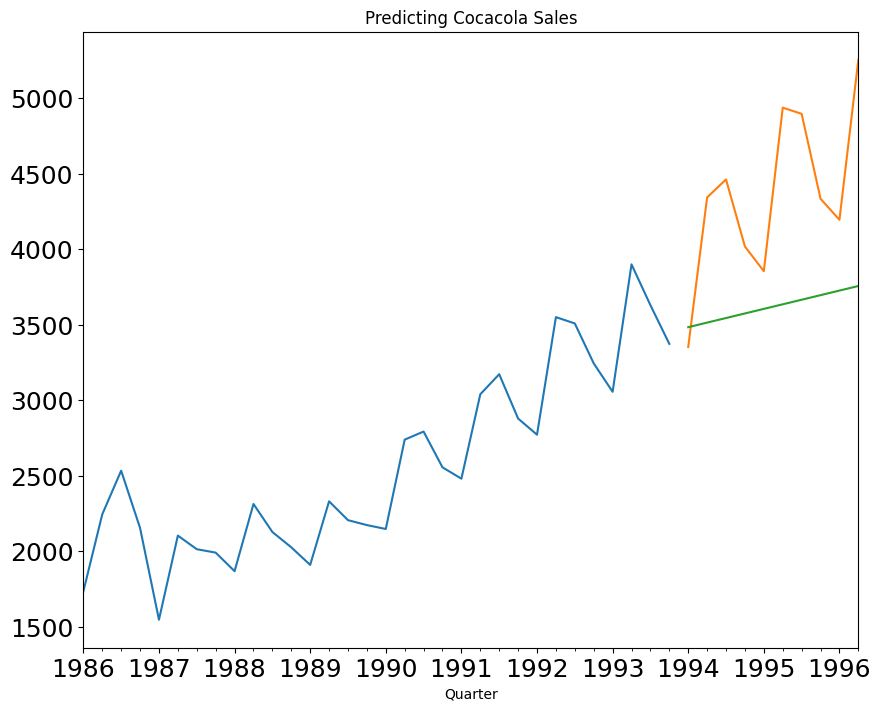

In [269]:

from statsmodels.tsa.api import  Holt 

Holt_cocacola=test.copy()
fit1=Holt(train).fit(smoothing_level=0.8,smoothing_trend=0.2)
Holt_cocacola['Holt_linear']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,8),title='Holt-train sales data', fontsize=16)
test.plot(figsize=(10,8),title='Holt- test sales data', fontsize=16)
Holt_cocacola['Holt_linear'].plot(figsize=(10,8), title='Predicting Cocacola Sales', fontsize=18)
plt.show()

In [271]:
rmse = sqrt(mean_squared_error(test, Holt_cocacola['Holt_linear']))
print(rmse)

887.487405893004


### 3. Forecasting using Holt Winter Model

<Axes: title={'center': 'Sales of Cocacola- Quarterly'}, xlabel='Quarter'>

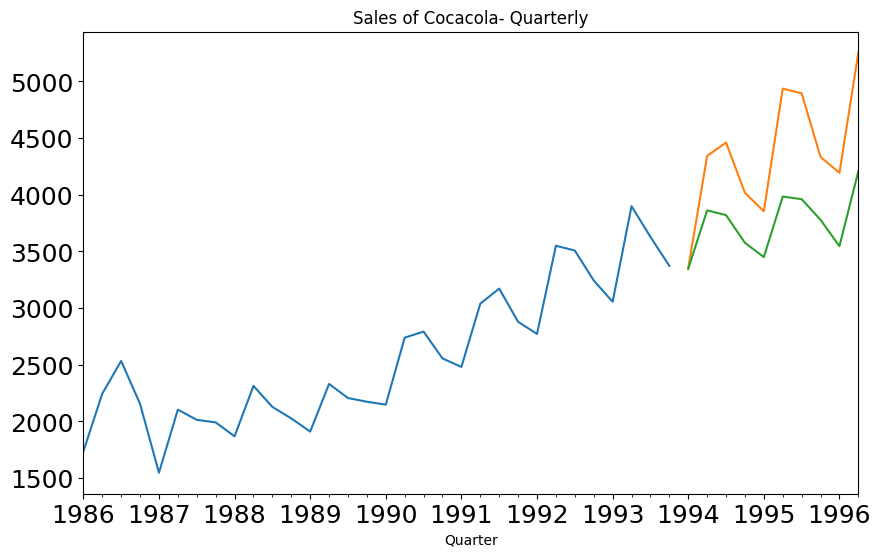

In [279]:
from statsmodels.tsa.api import ExponentialSmoothing 

Holt_Winter_cocacoladata=test.copy()

fit1=ExponentialSmoothing(train, seasonal_periods=12,
                          
                          trend='add',
                          seasonal='add').fit()

Holt_Winter_cocacoladata['Holt_Winter']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title='Cocacola Sales- train', fontsize=14)
test.plot(figsize=(10,6), title='Cocacola Sales- test', fontsize=14)
Holt_Winter_cocacoladata['Holt_Winter'].plot(figsize=(10,6), title='Sales of Cocacola- Quarterly', fontsize=18)

In [281]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, Holt_Winter_cocacoladata['Holt_Winter']))
print(rmse)

677.9514603678076


### 4. Forecasting using SARIMAX

In [282]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

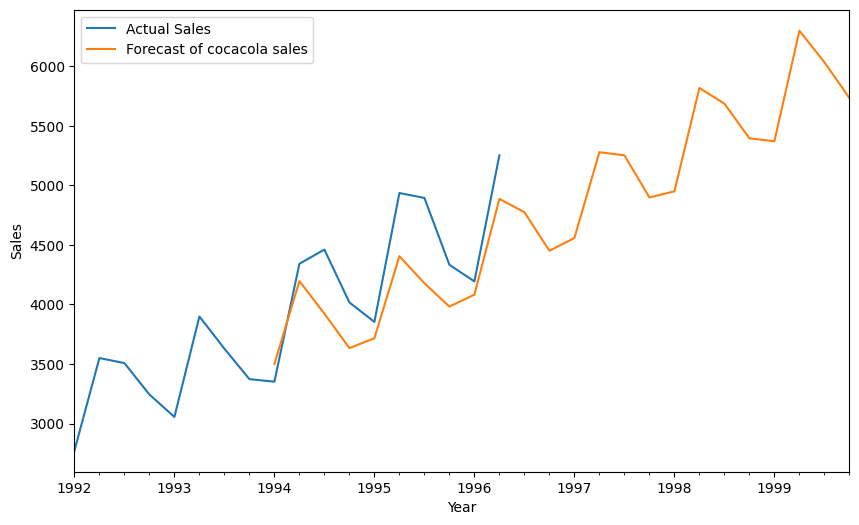

In [284]:
pred=model.get_forecast(steps=24)
plt.figure(figsize=(10,6))
ax=y['1992':].plot(label='Actual Sales')
pred.predicted_mean.plot(ax=ax, label='Forecast of cocacola sales')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [288]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_values = pred.predicted_mean[:len(test)]

# Calculate the RMSE
rmse = sqrt(mean_squared_error(test, pred_values))
print(rmse)

395.2871206648318


Simple Exponential Smoothing has highest rmse is highest.
SARIMAX seems to be best with predictions.